In [1]:
# import models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [4]:
# read data
data = pd.read_csv("New York Airbnb_4 dec 2021.csv")

In [5]:
# git info about the data
print(data.shape)
print(data.head(3))
print(data.columns.values)
print(data.isnull().sum())

(38277, 18)
     id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1  LisaRoxanne            Brooklyn  Bedford-Stuyvesant  40.68494  -73.95765   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 48  2019-11-04   
1  Entire home/apt     75               1                409  2021-10-22   
2     Private room     60              30                 50  2016-06-05   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0      

In [6]:
# drop columns is  not important
data = data.drop(["id","name","host_id","host_name","license"],axis=1)
print(data.dtypes)

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object


In [7]:
# data cleaning in "reviews_per_month"
data["reviews_per_month"].fillna(data["reviews_per_month"].mean(), inplace=True)
print(data.isnull().sum())

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9504
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


In [8]:
# data cleaning in "last_review"
data["last_review"] = pd.to_datetime(data["last_review"]) 
data["last_day_review"] = data["last_review"].dt.day
data["last_month_review"] = data["last_review"].dt.month
data["last_year_review"] = data["last_review"].dt.year
data = data.drop("last_review",axis=1)
data["last_day_review"].fillna(0, inplace=True)
data["last_month_review"].fillna(0, inplace=True)
data["last_year_review"].fillna(data["last_year_review"].mean(), inplace=True)
print(data.dtypes)
print(data.isnull().sum())

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
last_day_review                   float64
last_month_review                 float64
last_year_review                  float64
dtype: object
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count  

In [9]:
# LabelEncoder
La = LabelEncoder()

In [10]:
# data cleaning in "neighbourhood_group"
print(data["neighbourhood_group"].value_counts())
data["neighbourhood_group"] = La.fit_transform(data["neighbourhood_group"])
print(data["neighbourhood_group"].value_counts())

Manhattan        16781
Brooklyn         14716
Queens            5323
Bronx             1104
Staten Island      353
Name: neighbourhood_group, dtype: int64
2    16781
1    14716
3     5323
0     1104
4      353
Name: neighbourhood_group, dtype: int64


In [11]:
# data cleaning in "neighbourhood"
print(data["neighbourhood"].value_counts())
print(data["neighbourhood"].nunique())
data["neighbourhood"] = La.fit_transform(data["neighbourhood"])
print(data["neighbourhood"].value_counts())

Bedford-Stuyvesant    2821
Williamsburg          2603
Harlem                1971
Hell's Kitchen        1702
Bushwick              1693
                      ... 
Woodrow                  1
Neponsit                 1
Lighthouse Hill          1
Country Club             1
Castle Hill              1
Name: neighbourhood, Length: 222, dtype: int64
222
12     2821
216    2603
96     1971
97     1702
27     1693
       ... 
89        1
116       1
83        1
220       1
31        1
Name: neighbourhood, Length: 222, dtype: int64


In [12]:
# data cleaning in "room_type"
print(data["room_type"].value_counts())
data["room_type"] = data["room_type"].map({"Entire home/apt":1,"Private room":2,"Shared room":3,
                                           "Hotel room":4})

Entire home/apt    20397
Private room       17098
Shared room          572
Hotel room           210
Name: room_type, dtype: int64


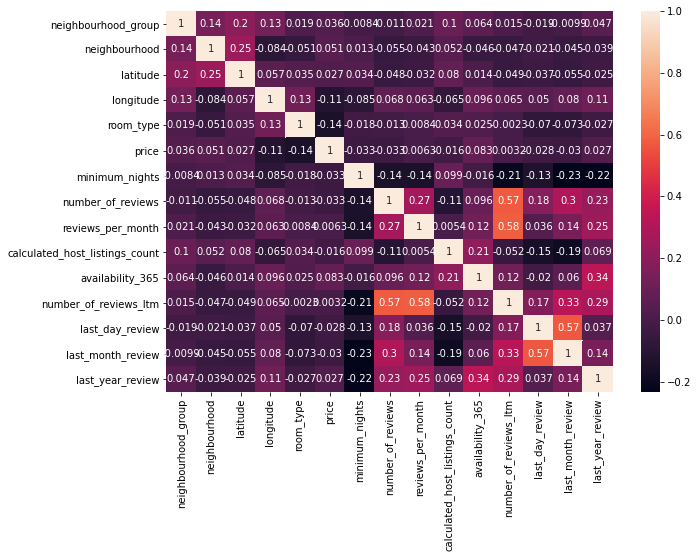

In [13]:
# data heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

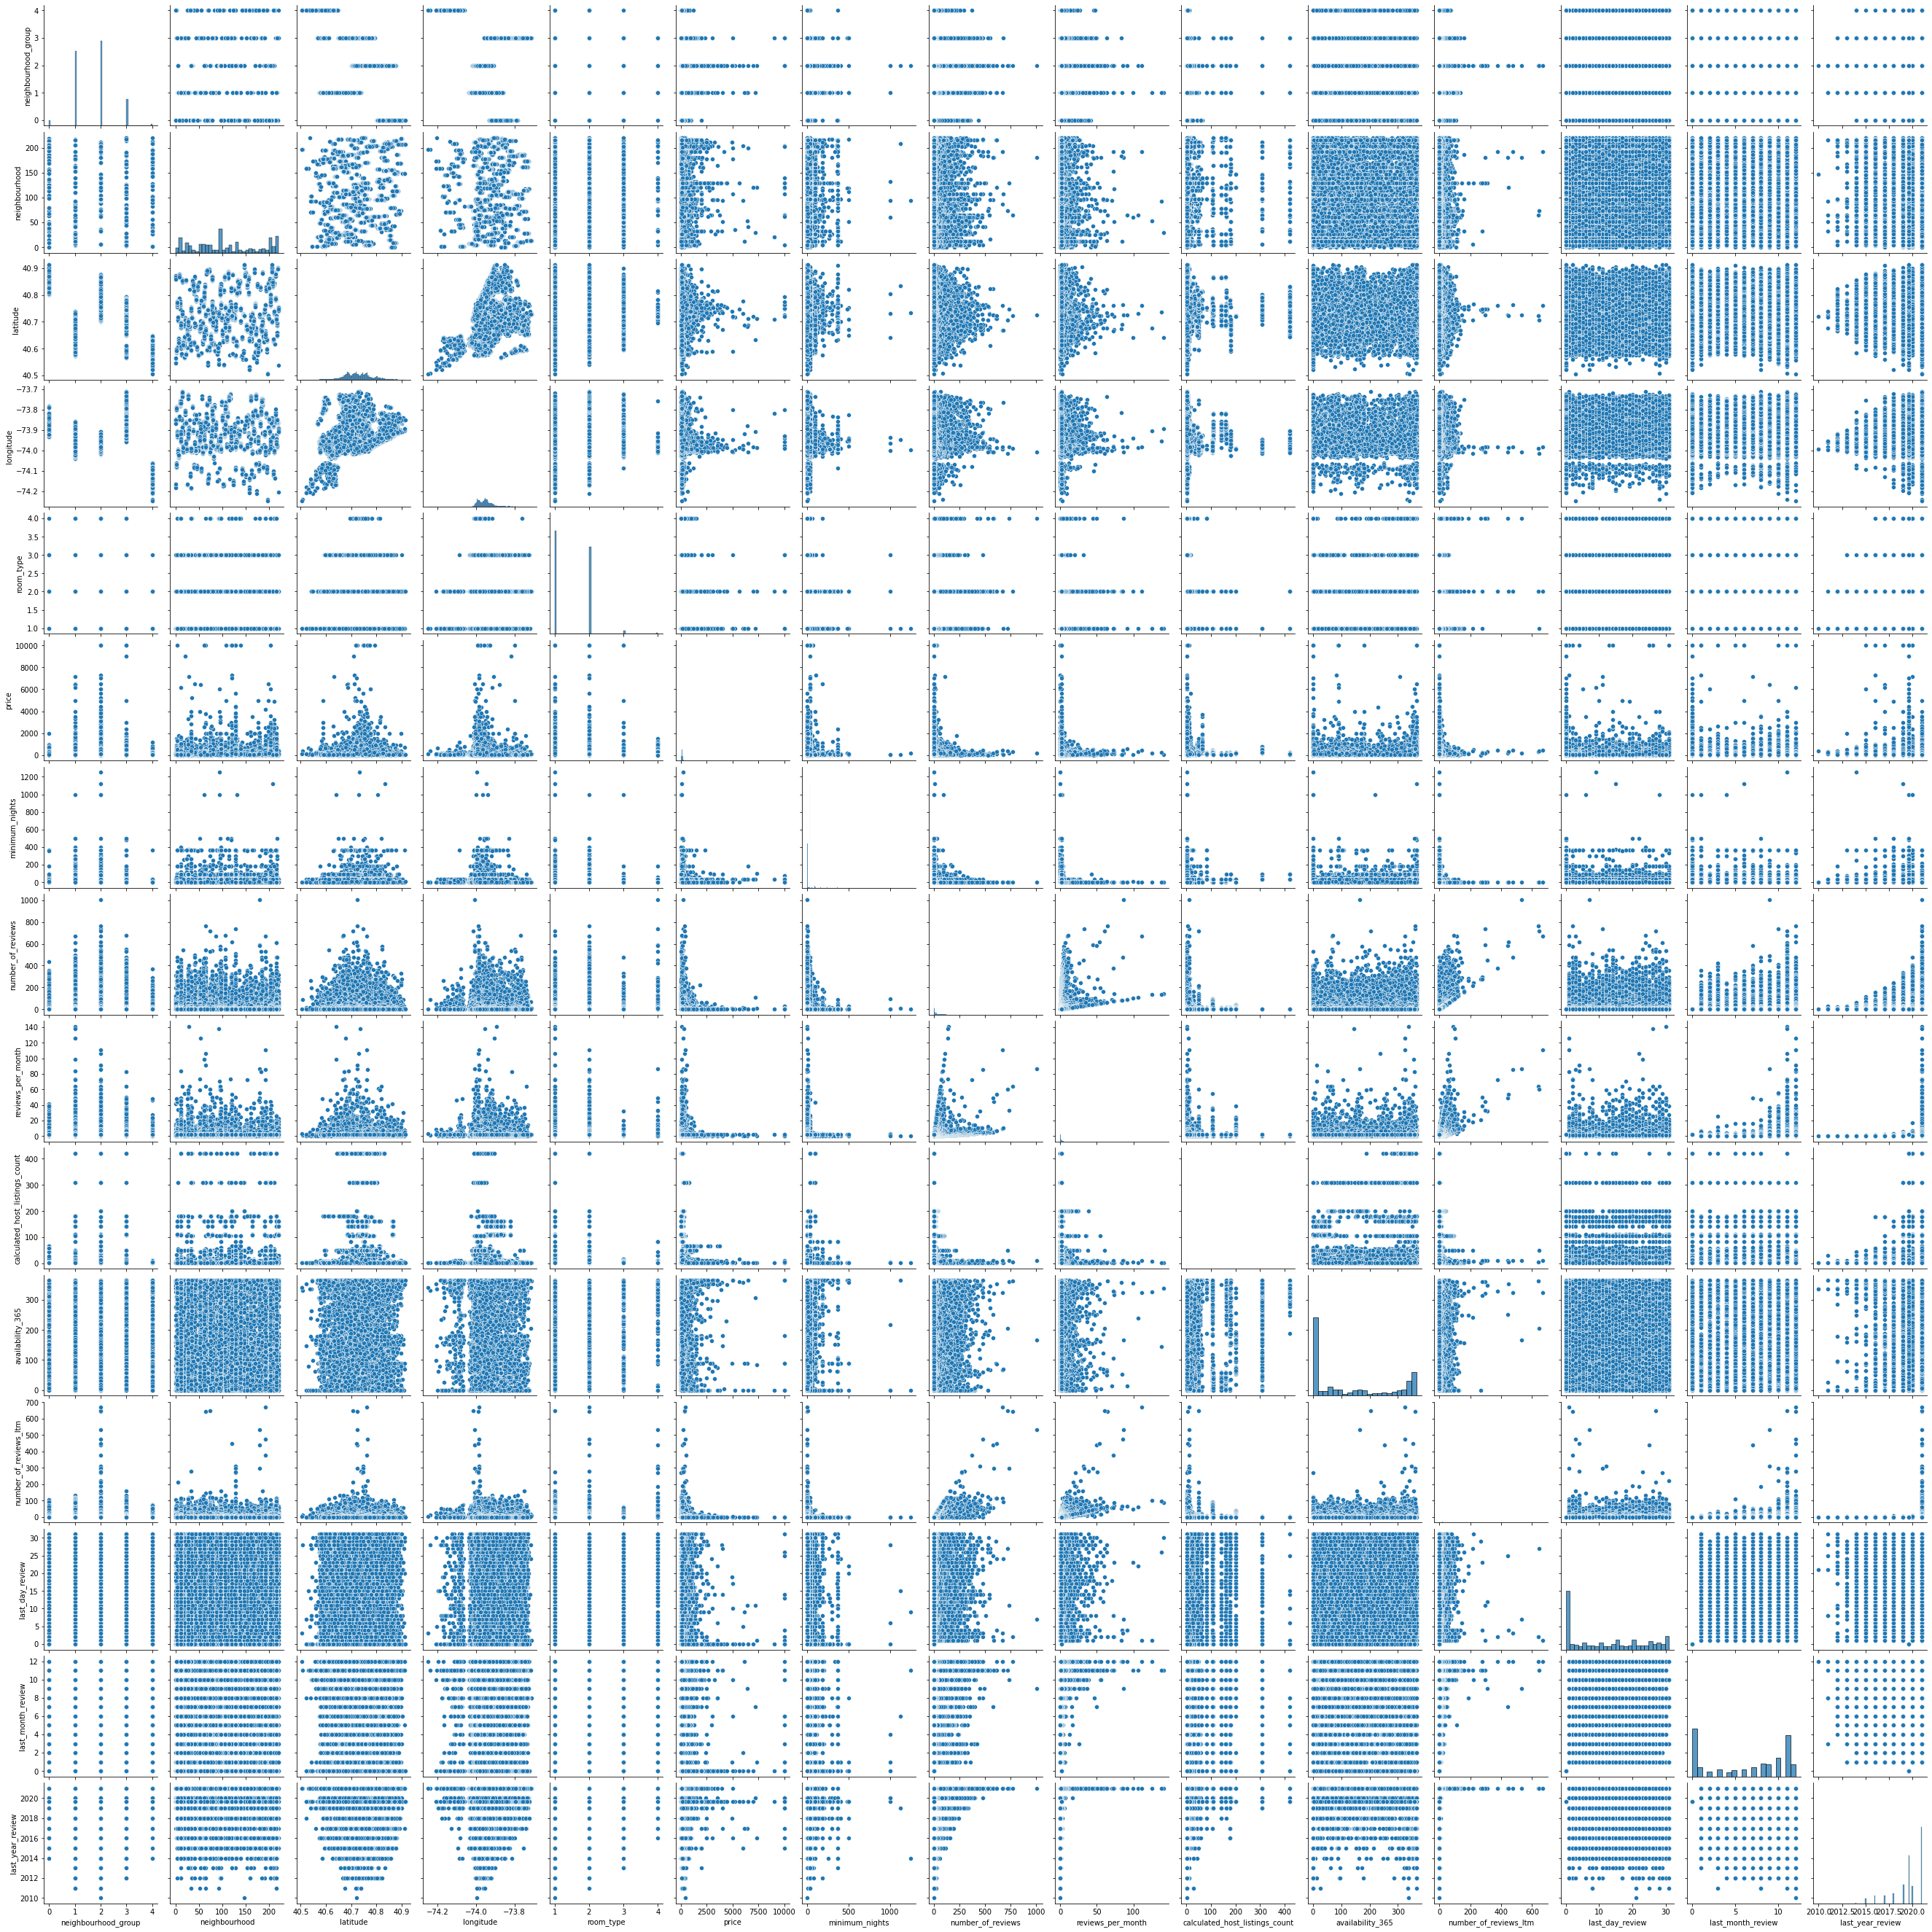

In [15]:
# pairplot to data
sns.pairplot(data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


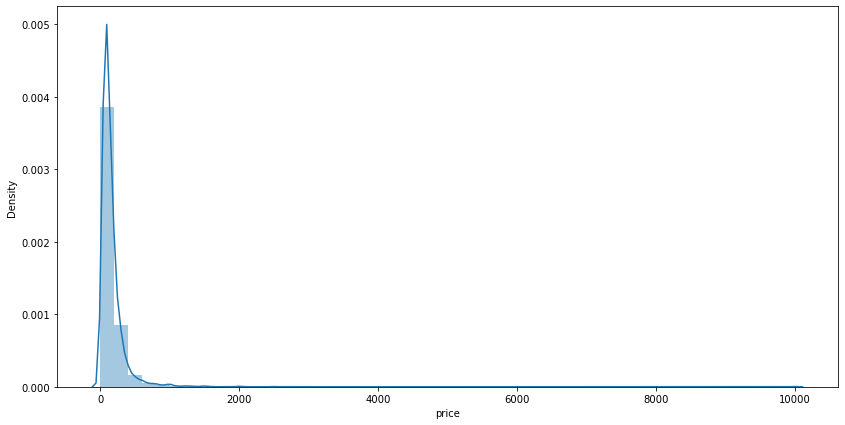

In [16]:
# distplot to price
plt.figure(figsize=(14,7))
sns.distplot(data["price"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


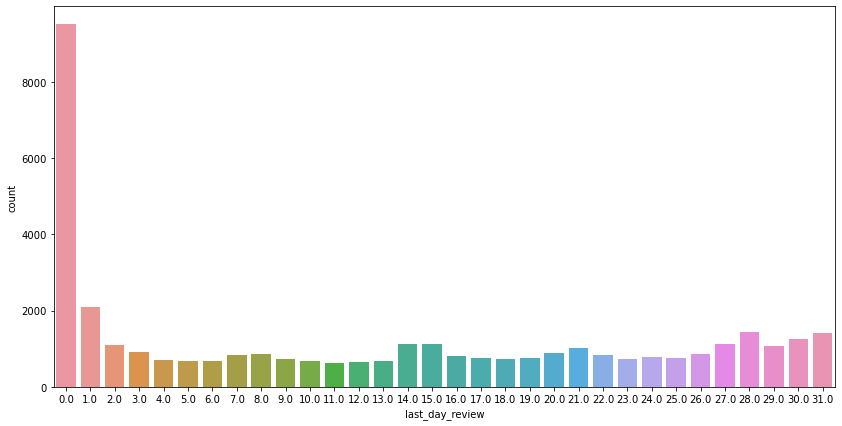

In [17]:
# countplot "last_day_review"
plt.figure(figsize=(14,7))
sns.countplot(data["last_day_review"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


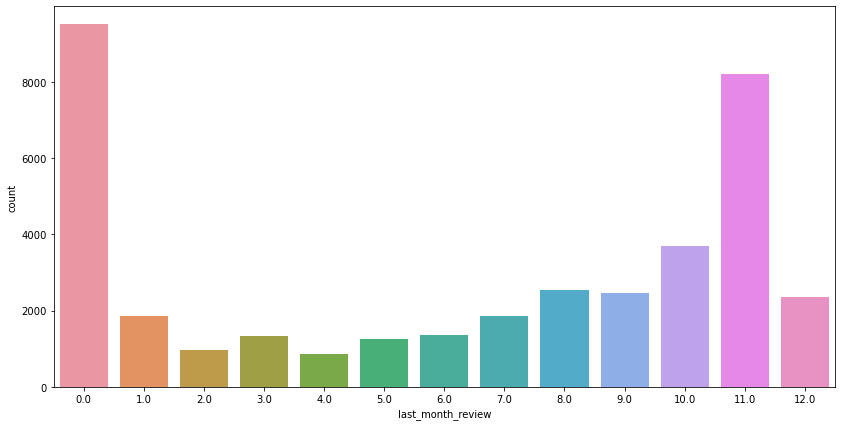

In [18]:
# countplot "last_month_review"
plt.figure(figsize=(14,7))
sns.countplot(data["last_month_review"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


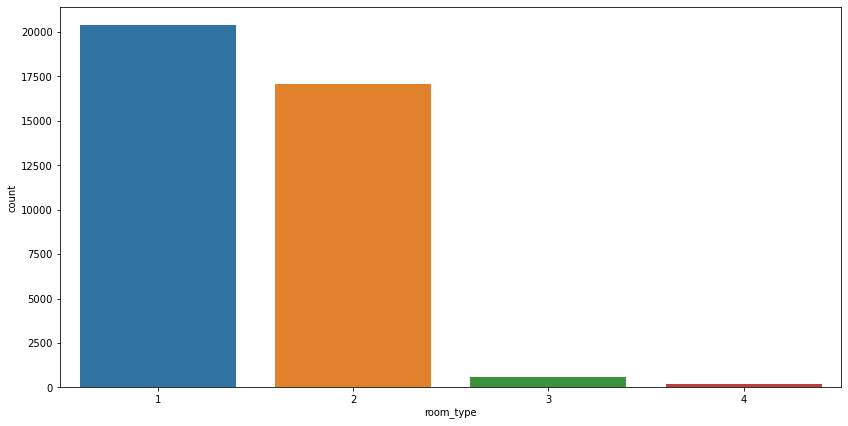

In [19]:
# countplot "room_type"
plt.figure(figsize=(14,7))
sns.countplot(data["room_type"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


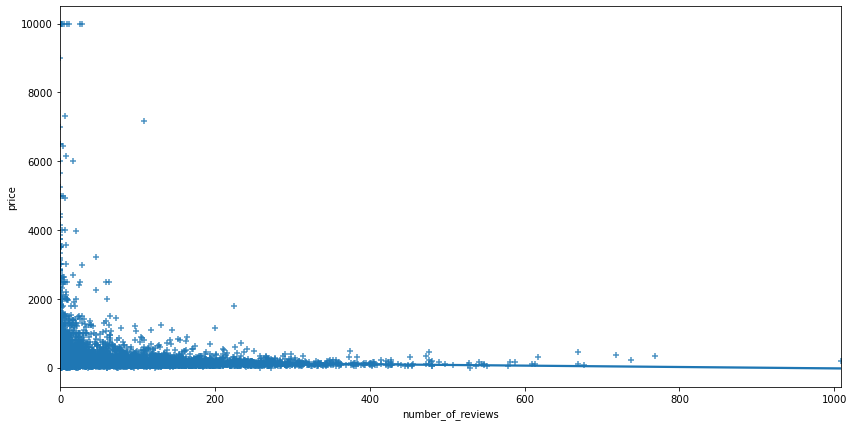

In [20]:
# regplot between "number_of_reviews" & "price"
plt.figure(figsize=(14,7))
sns.regplot(data["number_of_reviews"],data["price"], marker="+")
plt.show()

In [21]:
# chak data again
print(data.dtypes)
print(data.isnull().sum())

neighbourhood_group                 int32
neighbourhood                       int32
latitude                          float64
longitude                         float64
room_type                           int64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
last_day_review                   float64
last_month_review                 float64
last_year_review                  float64
dtype: object
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count  

In [22]:
# x & y
x = data.drop("price", axis=1)
y = data["price"]
print(x.shape)
print(y.shape)

(38277, 14)
(38277,)


In [23]:
# StandardScaler to x 
ss = StandardScaler()
x = ss.fit_transform(x)
print(x[:5])

[[ 0.36907611  0.29692211  0.43682925 -0.72150628 -0.88161021  0.28323966
   0.4898783  -0.36465441 -0.24932773  1.42260557 -0.34247349 -0.7572407
   1.05070625 -0.39296067]
 [-0.92758531 -1.40749301 -0.79399062 -0.17105936 -0.88161021 -0.69738634
   7.65047039  0.82288111 -0.28314026  0.41697899  1.83534897  0.87795834
   0.8323207   0.8515121 ]
 [-0.92758531 -1.40749301 -0.78663655 -0.12121574  0.90650944  0.28323966
   0.52954917 -0.31484608 -0.266234    1.61116056 -0.34247349 -0.66639631
  -0.04122151 -2.25966981]
 [-0.92758531  1.2146841  -1.1938008  -0.89783054 -0.88161021 -0.56212758
  -0.42255172 -0.44592064 -0.28314026 -0.07885079 -0.27441654 -0.39386314
   0.3955496   0.8515121 ]
 [ 0.36907611  0.29692211  0.63431289 -0.67382977  0.90650944 -0.66357165
   9.59434304  0.51354514 -0.28314026  0.40301195  1.90340592 -0.39386314
   1.05070625  0.8515121 ]]


In [24]:
# data spliting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,shuffle =True)
print(X_train.shape)
print(y_train.shape)

(26793, 14)
(26793,)


In [25]:
# LinearRegression model
Lo = LinearRegression()
Lo.fit(X_train, y_train)

print("*"*100)
print(Lo.score(X_train, y_train))
print(Lo.score(X_test, y_test))
print("*"*100)

****************************************************************************************************
0.05340428905534067
0.04732010256509189
****************************************************************************************************


In [26]:
# print("_"*150)
# for x in range(2,20):
#     Dt = DecisionTreeRegressor(max_depth=x,random_state=33)
#     Dt.fit(X_train, y_train)

#     print("x = ", x)
#     print(Dt.score(X_train, y_train))
#     print(Dt.score(X_test, y_test))
#     print("*"*100)

In [27]:
# for x in range(3,100):
#     KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = x, weights='uniform')
#     KNeighborsRegressorModel.fit(X_train, y_train)

#     KNeighborsRegressorModel.fit(X_train, y_train)

#     print("* "*50,x," *"*50)
#     print(KNeighborsRegressorModel.score(X_train, y_train))
#     print(KNeighborsRegressorModel.score(X_test, y_test))

In [28]:
# In these data,
# it is difficult to predict the price because
# the relationship between
# the input and the price is not strong,
# and therefore it is difficult to use any model with it.